## Sentiment Analysis With Machine Learning

In this project, we'll try to utilize machine learning models with tfidf/countervectorizer words representation to do sentiment analysis. It's amazing that machine leaning algorithms  have better performance of 88% accuracy even beat deep learning models with glove word embeddings which is 85% accuracy.

### Data Read
Here we have a look at movies reviews and labels.

In [1]:
import numpy as np
import pandas as pd
with open("data/reviews.txt",'r') as f:
    reviews = f.read()
with open("data/labels.txt",'r') as f:
    labels = f.read()
print (reviews[:1000])
print (labels[:100])

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turn

### Data Exploration
Before we represent words as numerical data,we split and check reviews with zero length and remove it.
1. The reviews are delimited with \n , we'll split reviews by \n
2. Checking reviews for zero length and removing it.
3. We explore reviews length and most common words to compare positive and negative reviews.

1. We split reviews and labels by \n

In [8]:
reviews_list = reviews.split('\n')
labels_list = labels.split('\n')

2. We find one review with zero length and remove it as well as its label.

In [9]:
reviews_series = pd.Series([r for r in reviews_list])
print ("Checking null values:  ",sum(reviews_series.isna()))
review_length = reviews_series.apply(lambda r:len(r))
zero_index = [i for i,v in enumerate(review_length) if v==0]
print ("the zero-length review have index  ",zero_index)
del reviews_list[25000]
del labels_list[25000]
print ("Remove the zero-length review!")

Checking null values:   0
the zero-length review have index   [25000]
Remove the zero-length review!


In [10]:
reviews_series = reviews_series.drop(index=zero_index,axis=0,inplace=False)
#print (reviews_series.shape)
labels_series = pd.Series([l for l in labels_list]).map({'positive':1,'negative':0})
print ("Sample labels:\n",labels_series[:3])
print ("The total reviews is {}.The ratio of positive reviews is {:.2f} ".format(reviews_series.shape[0],labels_series.sum()/labels_series.count()))

Sample labels:
 0    1
1    0
2    1
dtype: int64
The total reviews is 25000.The ratio of positive reviews is 0.50 


3. We explore and compare the reviews length for positive and negative reviews

In [11]:
dt = pd.DataFrame(reviews_series,columns=["review"])
dt["review_length"] = dt.review.apply(len)
dt["label"] = labels_list
dt.head()

,review,review_length,label
0,bromwell high is a cartoon comedy . it ran at ...,832,positive
1,story of a man who has unnatural feelings for ...,667,negative
2,homelessness or houselessness as george carli...,2398,positive
3,airport starts as a brand new luxury pla...,4476,negative
4,brilliant over acting by lesley ann warren . ...,857,positive


In [92]:
dt.groupby("label").review_length.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
negative,12500.0,1324.63800,969.383844,55.0,722.0,993.0,1595.0,9117.0
positive,12500.0,1367.62336,1058.787192,74.0,707.0,998.0,1673.0,13859.0


We see positive reviews are slightly longer than negative reviews.

Text(0.5, 0, 'review Length')

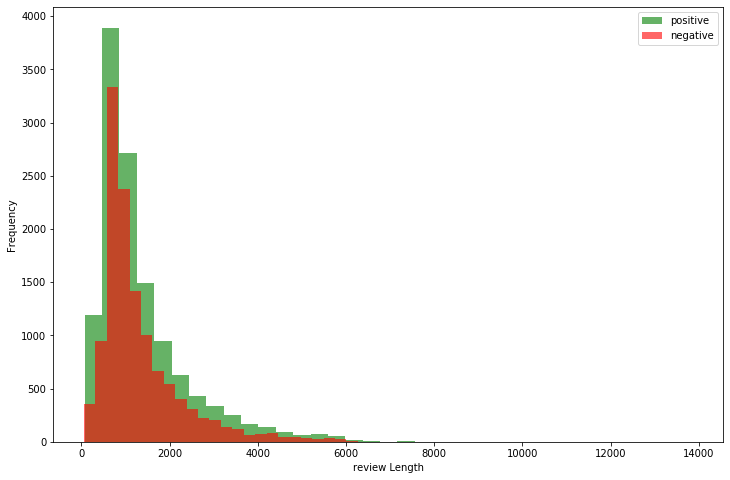

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

dt[dt.label=='positive'].review_length.plot(bins=35, kind='hist', color='green', 
                                       label='positive', alpha=0.6)
dt[dt.label=='negative'].review_length.plot(bins=35,kind='hist', color='red', 
                                       label='negative', alpha=0.6)
plt.legend()
plt.xlabel("review Length")

In [24]:
from collections import Counter
import string
from nltk.corpus import stopwords
def text_process(review):
    """
    Remove punctuations and stopwords in review.
    
    Return:
    list of cleaned words with lower case.
    """
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')])


We see the most common words are both in positive and negative reviews, these are useless to predict labels, we'll remove these most common words in model building.

In [25]:
dt["review_clean"] = dt.review.apply(text_process)
words_pos = dt[dt.label=='positive'].review_clean.apply(lambda x:[w for w in x.split()])
words_pos_counter = Counter()
for w in words_pos:
    words_pos_counter.update(w)
print ("The most common 50 words in positive reviews: ",words_pos_counter.most_common(50))
words_neg = dt[dt.label=='negative'].review_clean.apply(lambda x:[w for w in x.split()])
words_neg_counter = Counter()
for w in words_neg:
    words_neg_counter.update(w)
print ("The most common 50 words in negtive reviews:  ",words_neg_counter.most_common(50))

The most common 50 words in positive reviews:  [('br', 49235), ('film', 20937), ('movie', 19074), ('one', 13655), ('like', 9038), ('good', 7720), ('story', 6780), ('time', 6515), ('great', 6419), ('well', 6405), ('see', 6026), ('also', 5550), ('really', 5476), ('would', 5400), ('even', 4964), ('first', 4755), ('much', 4685), ('people', 4479), ('best', 4319), ('love', 4301), ('get', 4272), ('life', 4199), ('way', 4036), ('made', 3823), ('films', 3813), ('many', 3766), ('two', 3733), ('think', 3655), ('movies', 3586), ('characters', 3560), ('character', 3514), ('man', 3460), ('show', 3432), ('watch', 3424), ('seen', 3414), ('little', 3341), ('still', 3340), ('make', 3303), ('could', 3237), ('never', 3226), ('know', 2833), ('years', 2758), ('ever', 2734), ('end', 2696), ('real', 2568), ('scene', 2567), ('back', 2547), ('though', 2475), ('new', 2458), ('go', 2440)]
The most common 50 words in negtive reviews:   [('br', 52637), ('movie', 24965), ('film', 19218), ('one', 13134), ('like', 112

### Model and Train

We split the data into train and test set then use CountVectorizer and TfidfTransformer to vectorize words. We should fit and transform trainset and transform testset, so we have to do train_test_split at first. If we fit and transform on the whole dataset and then split them, the tfidf vectors will have both information on trainset and testset, that is data leakage. Be aware that if we fit on trainset, words only showing in testset will be disgarded when transform on testset. We could also use TfidfVectorizer to convert a collection of raw documents to a matrix of tfidf features. It combines the CountVectorizer and TfidfTransformer.

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(reviews_list,labels_list,train_size = 0.6,random_state=42)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


pipeline1 = Pipeline([('CountVect',CountVectorizer(lowercase=True,stop_words='english',analyzer='word',ngram_range=(1,2))),
                      ('TfidfTrans',TfidfTransformer()),
                      ('MultinomialNB',MultinomialNB())])

param = dict(CountVect__max_df=[0.1,0.2],CountVect__min_df=[2,5])

gridsearch1 = GridSearchCV(pipeline1,param_grid=param,scoring='accuracy',cv=5)

#print (gridsearch1.estimator.get_params().keys())
gridsearch1.fit(X_train,y_train)
print (gridsearch1.best_estimator_)

Pipeline(memory=None,
         steps=[('CountVect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.2,
                                 max_features=None, min_df=2,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('TfidfTrans',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('MultinomialNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


In [48]:
from sklearn import metrics
y_predict = gridsearch1.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.8796

We try to remove tfidf transformer and get the slightly lower score than best estimator with tfidf, so we keep tfidf.

In [51]:
pipeline_onlycv = Pipeline([
    ('CountVect',CountVectorizer(lowercase=True,stop_words='english',analyzer='word',ngram_range=(1,2),max_df=0.2,min_df=2)),
    ('MultinomialNB',MultinomialNB())
]
)
pipeline_onlycv.fit(X_train,y_train)
y_predict = pipeline_onlycv.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.8731

We test model with logisticregression ,and get a better performance on testset .

In [56]:
pipeline_lr = Pipeline([
    ('CountVect',CountVectorizer(lowercase=True,stop_words='english',analyzer='word',ngram_range=(1,2),max_df=0.2,min_df=2)),
    ('tfidf',TfidfTransformer()),
    ('logisticreg',LogisticRegression(solver='liblinear'))
]
)
pipeline_lr.fit(X_train,y_train)
y_predict = pipeline_lr.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.8847

In [57]:
metrics.confusion_matrix(y_test, y_predict)

array([[4321,  647],
       [ 506, 4526]])

In [101]:
y_test1 = pd.Series(y_test).map({'positive':1,'negative':0})
y_predict1 = pd.Series(y_predict).map({'positive':1,'negative':0})

In [105]:
print ("Sample predict error with true positive. \n")
print (np.array(X_test)[(y_test1==1) & (y_test1==y_predict1) ][2:3])
print ("\n Sample predict error with true negative. \n")
print (np.array(X_test)[(y_test1==0) & (y_test1==y_predict1) ][0:1])

Sample predict error with true positive. 

['by the end of the first hour my jaw was nestled comfortably between my feet . the movie never  and i do mean never  lets up in action . it may be mild action but it  s action . once again every member of the cast fits perfectly . the explosions were realistic  the chase scenes were feasible  and the fighting was incredible . matt damon will forever be jason bourne .  br    br   all i really have to say is that every bourne movie gets better and this is no exception . the action  the stakes  the plot . how they do it i will never know . i applaud the man who wrote the screen plays to every one of these movies . because if he hadn  t done such a great job with the first movie  we wouldn  t have this one to talk about .  br    br   so don  t go see it in theaters  go experience it in theaters if it  s still out where you live  but if not december   th bourne comes home to you   ']

 Sample predict error with true negative. 

['its hard to make 

In [108]:
print ("Sample predict error with false positive. \n")
print (np.array(X_test)[y_test1<y_predict1][2:3])
print ("\n Sample predict error with false negative. \n")
print (np.array(X_test)[y_test1>y_predict1][0:1])

Sample predict error with false positive. 

['hi  everyone  if you saw  singing in the rain   you remember the scene of gene kelly dancing in the rain . you also remember the dance number of donald o  connor   make  em laugh .  if you saw  royal wedding   you will remember fred astaire dancing on the ceiling . if you saw  jailhouse rock   you will even remember the title dance number choreographed by the king himself .  br    br   that is what is missing here . there could have been some blockbuster dance numbers in this presentation . the closest was chuck mcgowan  s  i can do that .  the mere fact that you have some talented people on stage moving together does not make a great dance film . richard attenborough was to blame for this failure . he pointed the camera at the stage and thought that would be a good thing .  br    br   yelling at people auditioning for a part in a broadway production is not entertainment . michael douglas would be just as badly cast if he were in a western 

In [113]:
CountVect = CountVectorizer(lowercase=True,stop_words='english',analyzer='word',ngram_range=(1,2),max_df=0.2,min_df=2)
tfidf = TfidfTransformer()
X_train1 = CountVect.fit_transform(X_train)
X_train2 = tfidf.fit_transform(X_train1)
X_test1 = CountVect.transform(X_test)
X_test2 = tfidf.transform(X_test1)


tp,tn,fp,fn don't show much difference in X_test

In [155]:
from scipy.sparse import csr_matrix
index_tp = y_test1[(y_test1==1) & (y_predict1==1)].index
print (X_test1[index_tp].toarray().std(axis=1,ddof=1).mean())
index_tn = y_test1[(y_test1==0)&(y_predict1==0)].index
print (X_test1[index_tn].toarray().std(axis=1,ddof=1).mean())

0.028653670296655182
0.027754644862324245


In [156]:
index_fp = y_test1[(y_test1==0) & (y_predict1==1)].index
print (X_test1[index_fp].toarray().std(axis=1,ddof=1).mean())
index_fn = y_test1[(y_test1==1)&(y_predict1==0)].index
print (X_test1[index_fn].toarray().std(axis=1,ddof=1).mean())

0.028392313306818427
0.028814910379469028


### Conclusion:
Machine learning algorithms with tfidf/countervectorizer words representing also do a good job of 88% accuracy on sentiment analysis. Even better than lstm,cnn with glove word embeddings of about 85% accuracy.